# Dielectric stack model

First, we import and define the plotting parameters:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

## Transfer Matrix Model

We define the matrices for an isotropic medium and an interface:

In [3]:
def isotropic_medium_matrix(n,k,L):
    
    P  = np.zeros((2,2),dtype=complex)
    
    P [0,0] = np.exp( 1j * n * k*L)
    P [1,1] = np.exp( -1j * n * k*L)
    
    return P

In [4]:
def interface_matrix(na,nb):
    
    I  = np.zeros((2,2))
    
    I [0,0] = 0.5* (na+nb) / (na)
    I [1,1] = I [0,0]
    I [0,1] = 0.5* (na-nb) / (na)
    I [1,0] = I [0,1]
    
    return I

For a unit cell with arbitrary stacks we can construct the band diagram (see, for example page 72 in : *Photonic crystal guiding - Skogorboratiy and Yang - 2009*):

In [6]:
def dispersion_diagram (M):
    c = 1                                                      #speed of light, normalized
    return (c) * (np.arccos(0.5*(M[0,0]+M[1,1]))) /(2*np.pi)   #normalized frequency

Let's try an example for a simple unit cell:

In [7]:
a = 1
nb = np.sqrt(100)
na = 1
k_array = np.linspace(-1,1, 5000)
L1, L2, L3 = a/4, a/2, a/4

We set the parameters for a quarter wave-stack and choose a high refractive index difference,so we obtain a band-gap in our simulation.

We create the transfer matrix and find the dispersion diagram:

In [8]:
M_k = np.zeros((2,2, len(k_array)),dtype=complex)
freqs0 = np.zeros(len(k_array), dtype=complex)
for i in range(len(k_array)):
    M_k [:,:, i] = isotropic_medium_matrix(na,k_array[i],L1) @ interface_matrix(na,nb) \
                @ isotropic_medium_matrix(nb,k_array[i],L2)  @ interface_matrix(nb,na) \
                @ isotropic_medium_matrix(na,k_array[i],L3)
    M_k [:,:, i] = M_k [:,:, i] @ M_k [:,:, i]
    freqs0[i] = (dispersion_diagram(M_k[:,:,i]))

Now we find the dispersion diagram:

Text(0, 0.5, 'Im[$\\omega a / 2 \\pi c$]')

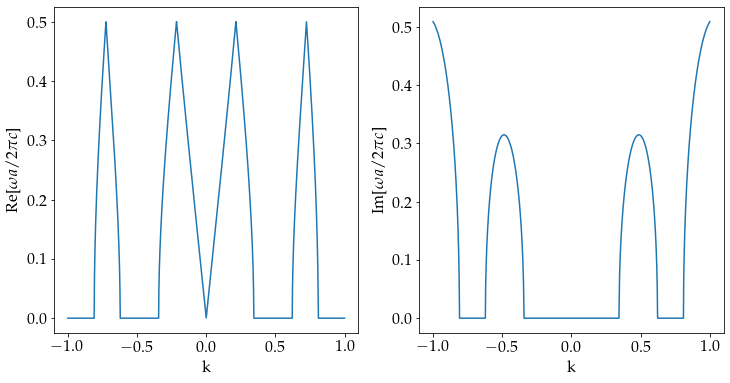

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(k_array, np.real(freqs0))
ax[1].plot(k_array, np.abs(np.imag(freqs0)))

ax[0].set_xlabel("k")
ax[0].set_ylabel("Re[$\omega a / 2 \pi c$]")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Im[$\omega a / 2 \pi c$]")

We can see that we obtain band gaps! At some point the real part becomes zero and the imaginary part gets bigger and bigger!

## Group velocity and index

The group velocity is just the derivative of the frequency $\omega$ with respect to $k$:

In [15]:
v_g = np.diff(np.real(freqs0)) / np.diff(k_array)
v_g_im = np.diff(np.imag(freqs0)) / np.diff(k_array)

k_array_d = (np.array(k_array)[:-1] + np.array(k_array)[1:]) / 2

Text(0, 0.5, 'Im{$v_g$}')

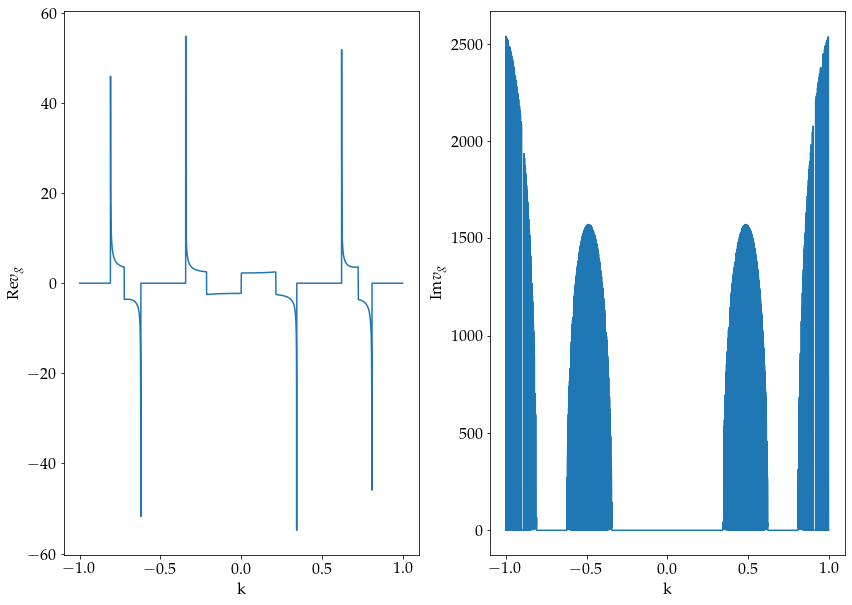

In [16]:
fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].plot(k_array_d,v_g)
ax[1].plot(k_array_d, np.abs(v_g_im))

ax[0].set_xlabel("k")
ax[0].set_ylabel("Re{$v_g$}")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Im{$v_g$}")

In a finite structure, we can define the mean propagation constant:

$\phi=\int^L_0 dx \beta(x) = \bar\beta L$

and therefore, a mean group velocity:

$ \bar v_g = \frac{d \omega}{d \bar\beta}= L \frac{d \omega}{d \phi}$

Equivalently: $\bar n = c / \bar v_g$ This quantity can be readily calculated from
a transfer matrix, as $\phi= arg(t)$.

In [17]:
k_array = np.linspace(-0.2,0.2, 5000)
k_array_d = (np.array(k_array)[:-1] + np.array(k_array)[1:]) / 2
phi = np.zeros(len(k_array))
for i in range(len(k_array)):
    M_k [:,:, i] = isotropic_medium_matrix(na,k_array[i],L1) @ interface_matrix(na,nb) \
                @ isotropic_medium_matrix(nb,k_array[i],L2)  @ interface_matrix(nb,na) \
                @ isotropic_medium_matrix(na,k_array[i],L3)
    M_k [:,:, i] = M_k [:,:, i] @ M_k [:,:, i]
    freqs0[i] = (dispersion_diagram(M_k[:,:,i]))
    phi [i] = np.angle(1/M_k[1,1,i])

In [18]:
v_g_m = np.diff(np.real(freqs0)) / np.diff(phi)
v_g_m_im = np.diff(np.imag(freqs0)) / np.diff(phi)

phi_d = (np.array(phi)[:-1] + np.array(phi)[1:]) / 2

In [19]:
n_g = 1/v_g_m

<ipython-input-19-00749c133cc0>:1: RuntimeWarning: divide by zero encountered in true_divide
  n_g = 1/v_g_m


Text(0, 0.5, 'Re[$n_g$]')

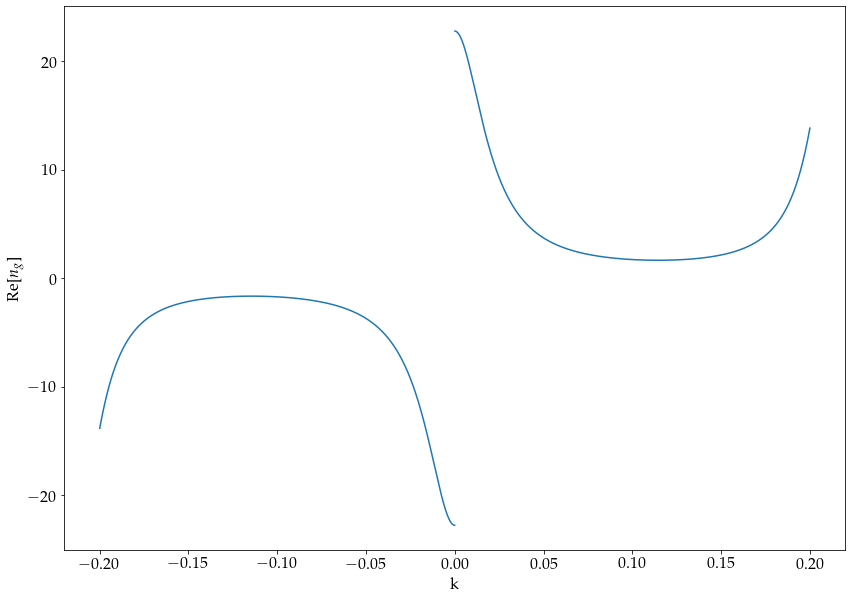

In [21]:
fig, ax = plt.subplots(figsize=(14,10))

ax.plot(k_array_d,n_g)

ax.set_xlabel("k")
ax.set_ylabel("Re[$n_g$]")